## Movie Reviews Bayesian Classifier Project

### Dataset

Dataset containing 83,446 enails labelled either spam or not spam. Dataset obtained from Kaggle at https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset/data.

Dataset contains the columns:

- label: If the email was spam or not (1 for spam, 0 for not spam)
- text: The contents of the email.

##### Preprocessing

No preprocessing was performed on the dataset.

### Findings

From performing operations on this dataset, I have found that the Support Vector Machine model was overfit to the data. This can be seen by the results in the classification report, with every accuracy measurement being above 0.98. 

This issue was marginally improved by lowering the regularisation parameter, but not be enough to solve the overfitting issue.

## Changelog

#### Version 1

- Read in dataset.
- Split data into training and test data.
- Converted text data to number vector using tfidf vectoriser.
- Added SVM model using rbf kernel.
- Fit model to the data.
- Analysed accuracy of the model using accuracy measurements and confusion matrix.

#### Version 2

- Added model with a regularisation parameter of 0.5.
- Fit the model to the data
- Analysed accuracy of the model using accuracy measurements and confusion matrix.
- Compared accuracy to the previous model.

In [1]:
# import pandas to read file

import pandas as pd

In [4]:
# Read dataset, print rows to check if it has worked

df = pd.read_csv("../../spam_email.csv")
print(df.head())

   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
2      0   computer connection from cnn com wednesday es...
3      1  university degree obtain a prosperous future m...
4      0  thanks for all your answers guys i know i shou...


In [5]:
# Check for any rows with null values

print(df.isnull().sum())

label    0
text     0
dtype: int64


In [7]:
# Set y to label column and X to text column

X = df["text"].values
y = df["label"].values

In [9]:
# Split the data into training and test data, 20% test data, 80% training data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Convert text data into number vector

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [11]:
# Initialise SVM model and fit it to the data

from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')


svm_model.fit(X_train, y_train)

SVC()

In [12]:
# Predict on the test set
y_pred = svm_model.predict(X_test)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7938
           1       0.99      1.00      0.99      8752

    accuracy                           0.99     16690
   macro avg       0.99      0.99      0.99     16690
weighted avg       0.99      0.99      0.99     16690



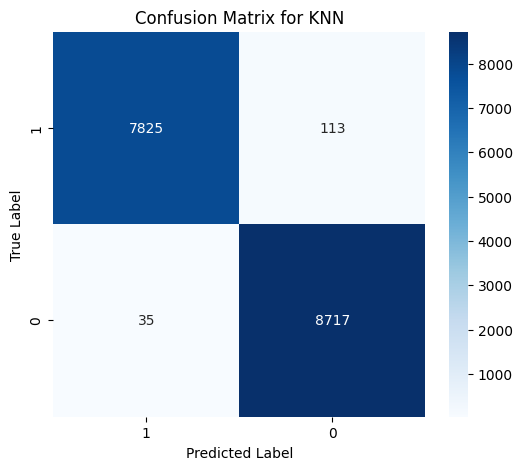

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2}')

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix of results
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6,5))
class_labels = df['label'].unique() 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN')
plt.show()

#### Results

The model is too accurate. This shows us that the model is overfit to the data.

In [ ]:
# Initialise SCM model with lower regularisation parameter and fit it to the data

svm_model = SVC(kernel='rbf', C=0.5, gamma='scale')


svm_model.fit(X_train, y_train)

SVC(C=0.5)

In [16]:
# Predict on the test set
y_pred = svm_model.predict(X_test)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7938
           1       0.98      1.00      0.99      8752

    accuracy                           0.99     16690
   macro avg       0.99      0.99      0.99     16690
weighted avg       0.99      0.99      0.99     16690



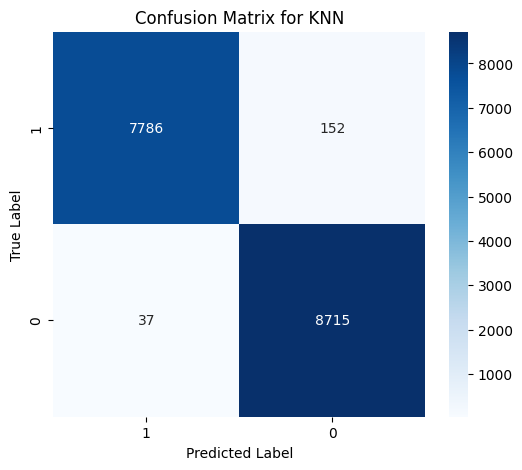

In [17]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2}')

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix of results
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6,5))
class_labels = df['label'].unique() 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN')
plt.show()

#### Results

Lowering the regularisation parameter to 0.5 caused a very minor improvement in the overfitting issue. The model is still overfitting, but lowering the parameter further may help resolve this.